# Vegetable price Analysis
An analysis of vegetable price for the year 2023

How are the prices change over time


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from datetime import date as dt
import matplotlib.pyplot as plt


In [25]:
df = pd.read_csv('prices.csv')
df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


In [26]:
#Check data types, entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [42]:
# summary statistics of all columns
df.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


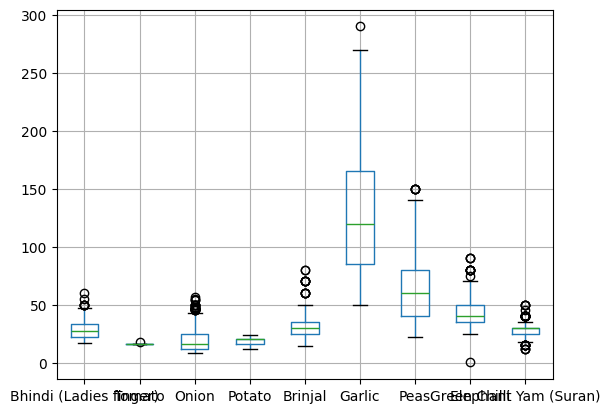

In [44]:
boxplot = df.boxplot(column=['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Green Chilli', 'Elephant Yam (Suran)'])

In [28]:
# Checking for missing data
df.isnull().any(axis=0).sum() # for columns
df.isnull().any(axis=1).sum() # for rows
df.isnull().sum()

,0
Price Dates,0
Bhindi (Ladies finger),0
Tomato,0
Onion,0
Potato,0
Brinjal,0
Garlic,0
Peas,0
Methi,0
Green Chilli,0


In [29]:
df.kurtosis(numeric_only=True)

,0
Bhindi (Ladies finger),0.362337
Tomato,287.000000
Onion,0.692638
Potato,-0.731091
Brinjal,2.857873
Garlic,-0.008867
Peas,-0.412516
Methi,285.356077
Green Chilli,2.141107
Elephant Yam (Suran),0.930687


In [30]:
# Check for duplicates
df['Dups'] = df.duplicated()
df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Dups
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25,False
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25,False
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25,False
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25,False
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25,False
...,...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25,False
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25,False
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25,False
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40,False


In [31]:
# check for duplicates
def check_dups(x):

    if x is True:
        return 1
    else:
        return 0



In [32]:
# check for duplicates
df["Change"] = df['Dups'].apply(check_dups)
df['Change'].sum()

0

# EDA
Peforming Exploratory Data Analysis


In [33]:
def to_date(x):
    newdate = dt(x)
    str_date = newdate.strftime('%Y-%m-%d')
    return str_date

df['Date'] = df['Price Dates'].apply(to_date)



TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
numerical_columns = df.select_dtypes('number')
# Assuming MD_agric_df is already defined with the simulated data

# Setting up a 5x4 grid of plots
fig, axes = plt.subplots(3, 4, figsize=(15, 15))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plotting a KDE for each column in its respective subplot
for i, column in enumerate(numerical_columns.columns):
    mean_val = numerical_columns[column].mean()
    sns.kdeplot(numerical_columns[column], ax= axes[i])
    axes[i].set_title(f"{column} Price KDE")
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2)


plt.tight_layout()
plt.show()

In [ ]:
#dates = df["Price Dates"].iloc[3:5]
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')
df['Month'] = df["Price Dates"].dt.month.map(month_map)
df



# Plot line graph over time(month) for each vegetable
# Plot bar graph of average price for each month per vegetable
# plot voilin

Pointers :
# What we are trying to find out from the data
Which vegetable is the most expensive/cheapest?
Which month has the highest or lowest average?
# Hypothesis testing


In [37]:
# Mean prices for each month
mean_month = df.groupby('Month').mean(numeric_only=True)



In [40]:
#df.drop(columns=["Dups"], inplace=True)

In [41]:
from google.colab import files
upload = files.upload()

import pandas as pd

df = pd.read_csv('prices.csv')

df.head()

Saving prices.csv to prices (3).csv


,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


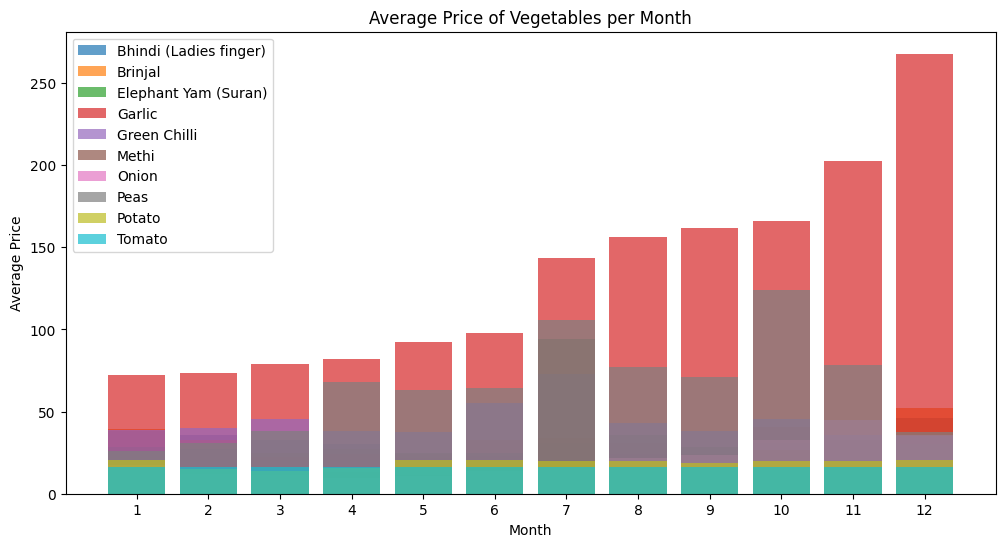

In [38]:
# prompt: Using dataframe df: plot bar graph of average price for each month per vegetable.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'

# Melt the dataframe to have a column for vegetable and its price
df_melted = pd.melt(df, id_vars=['Month', 'Year'],
                  value_vars=['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)'],
                  var_name='Vegetable', value_name='Price')

# Group by month and vegetable and calculate average price
average_price_per_month = df_melted.groupby(['Month', 'Vegetable'])['Price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
for vegetable in average_price_per_month['Vegetable'].unique():
    vegetable_data = average_price_per_month[average_price_per_month['Vegetable'] == vegetable]
    plt.bar(vegetable_data['Month'], vegetable_data['Price'], label=vegetable, alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price of Vegetables per Month')
plt.legend()
plt.xticks(range(1, 13))  # Set x-axis ticks for months
plt.show()

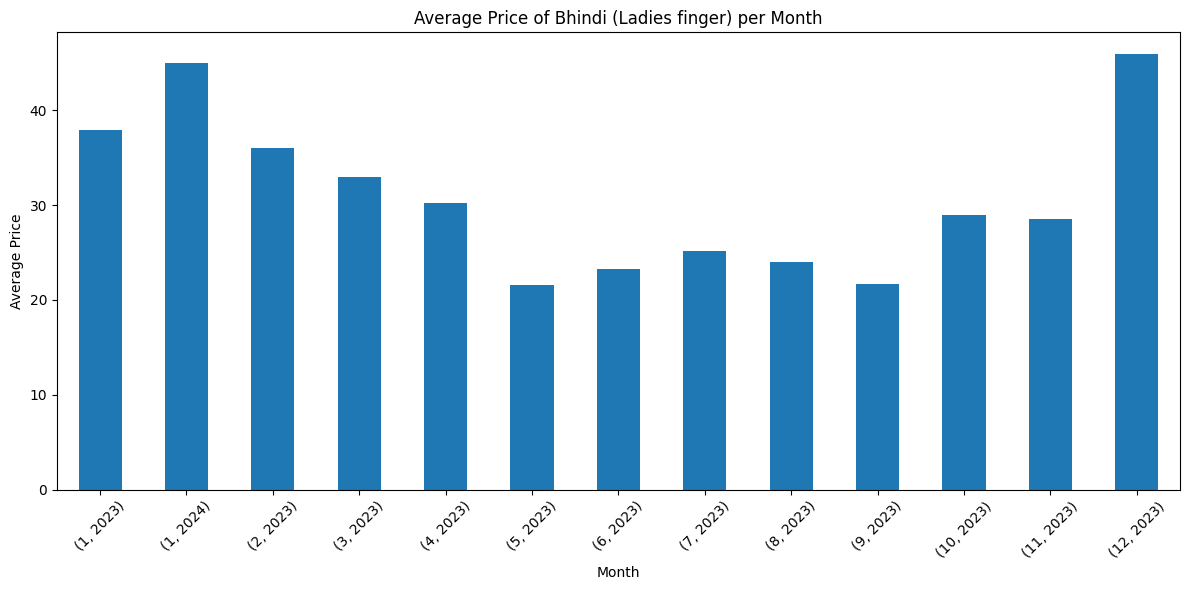

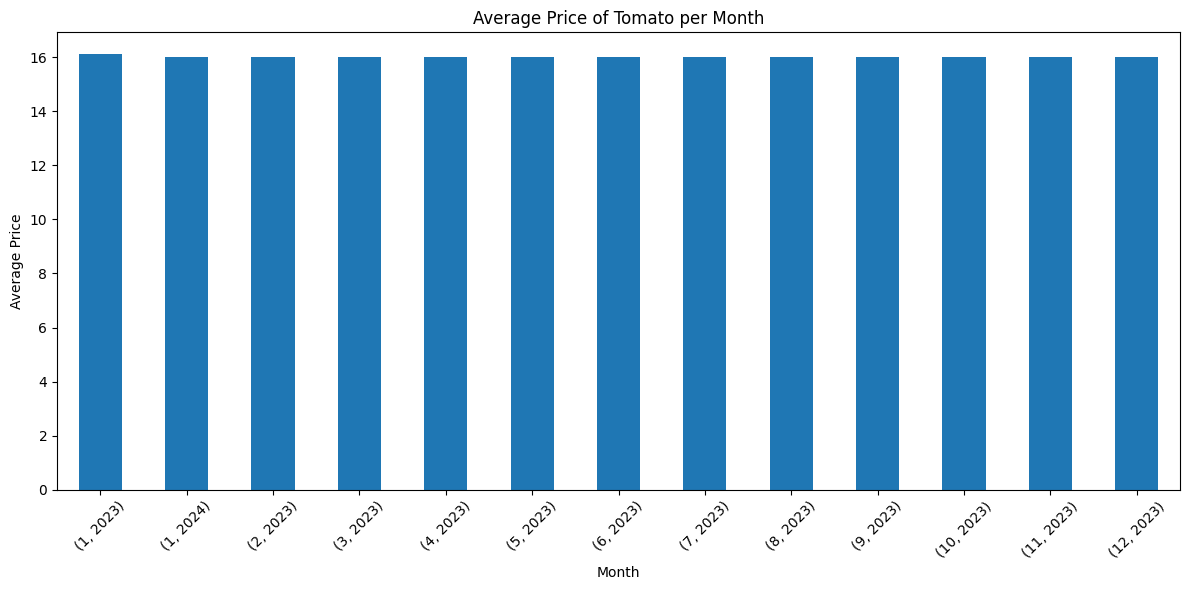

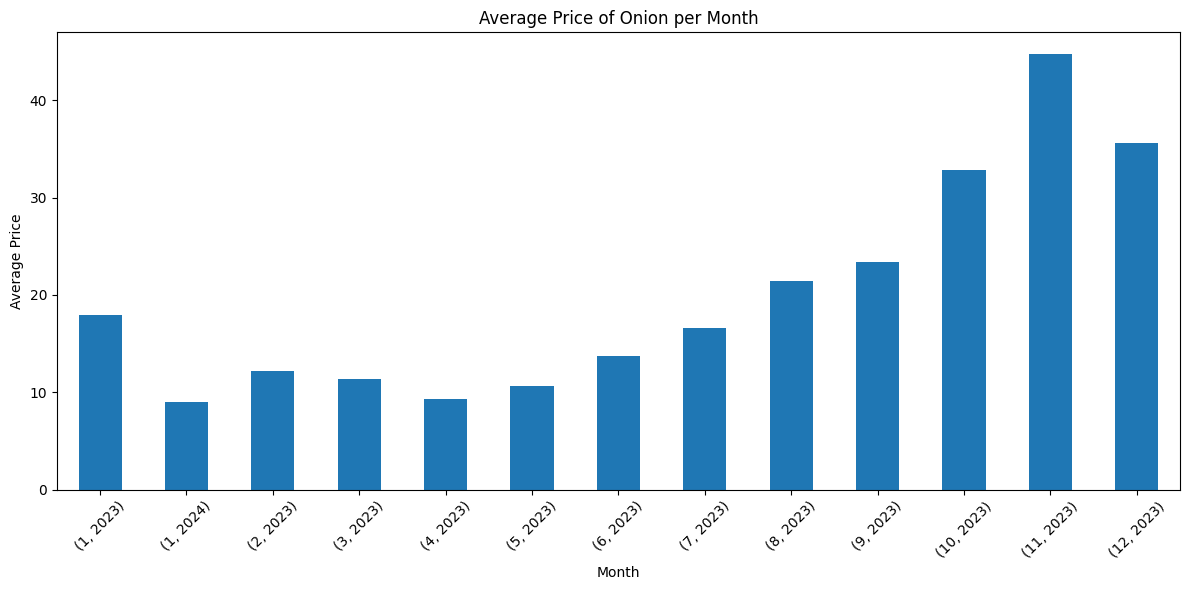

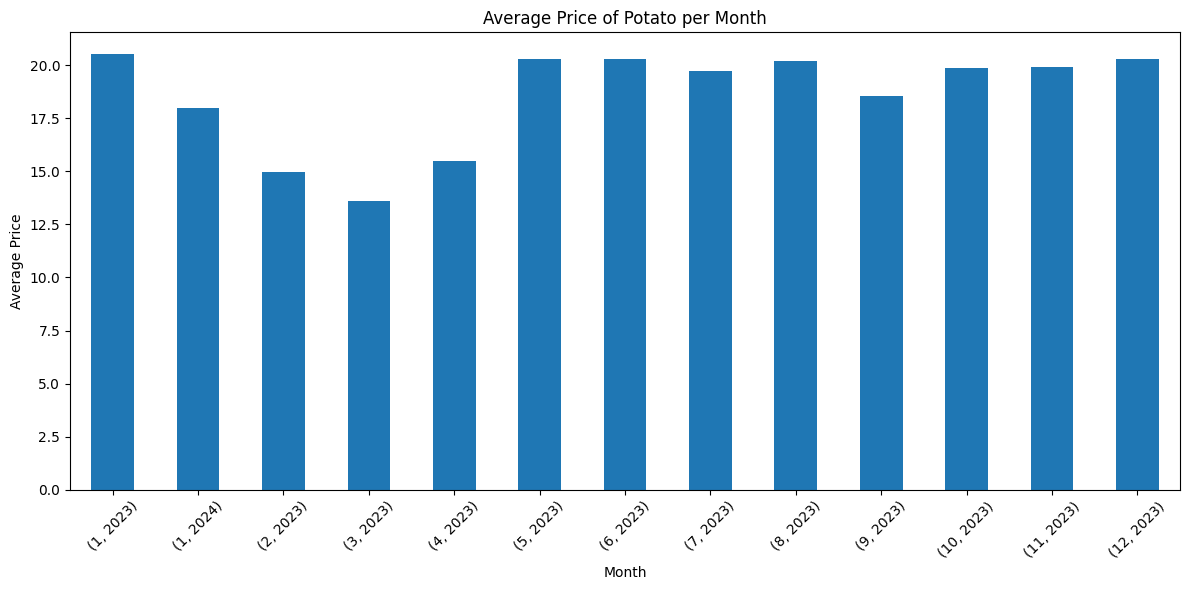

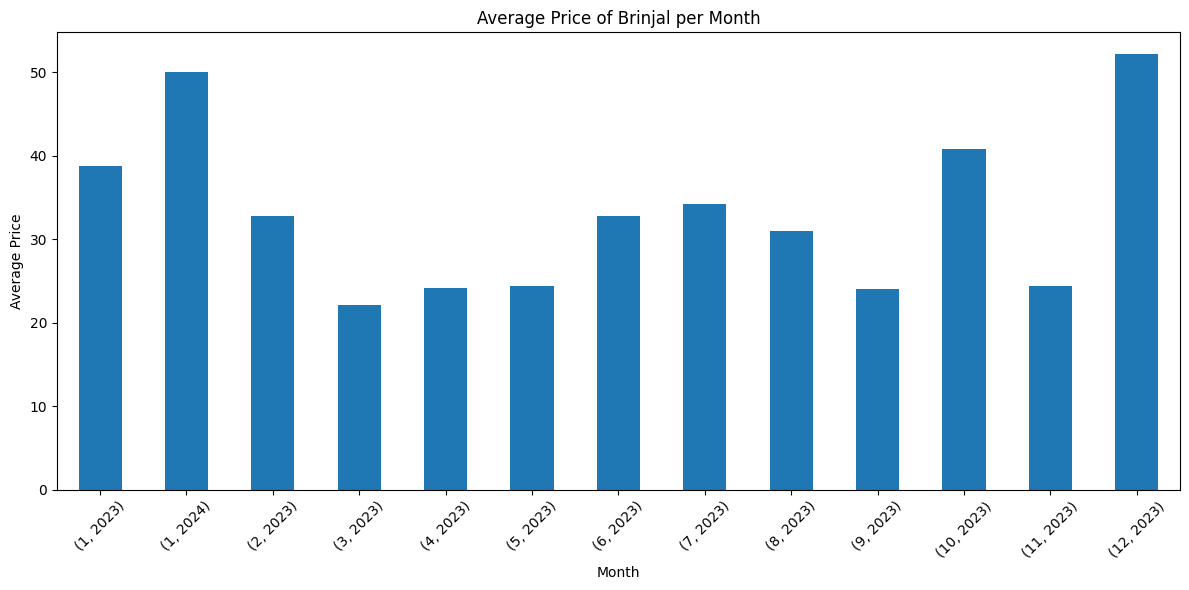

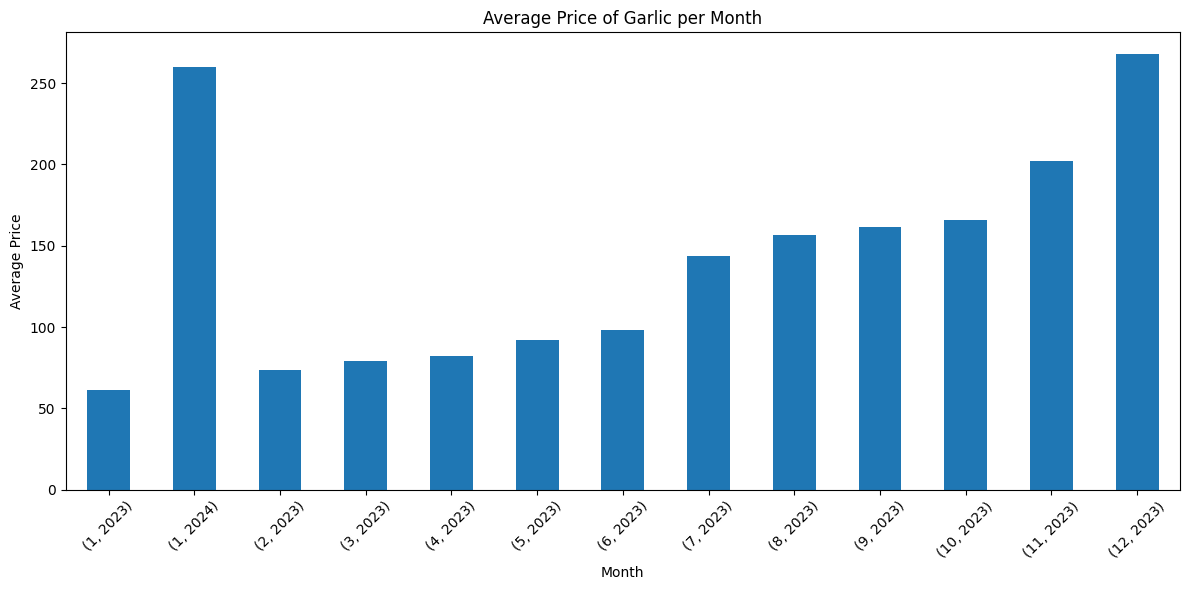

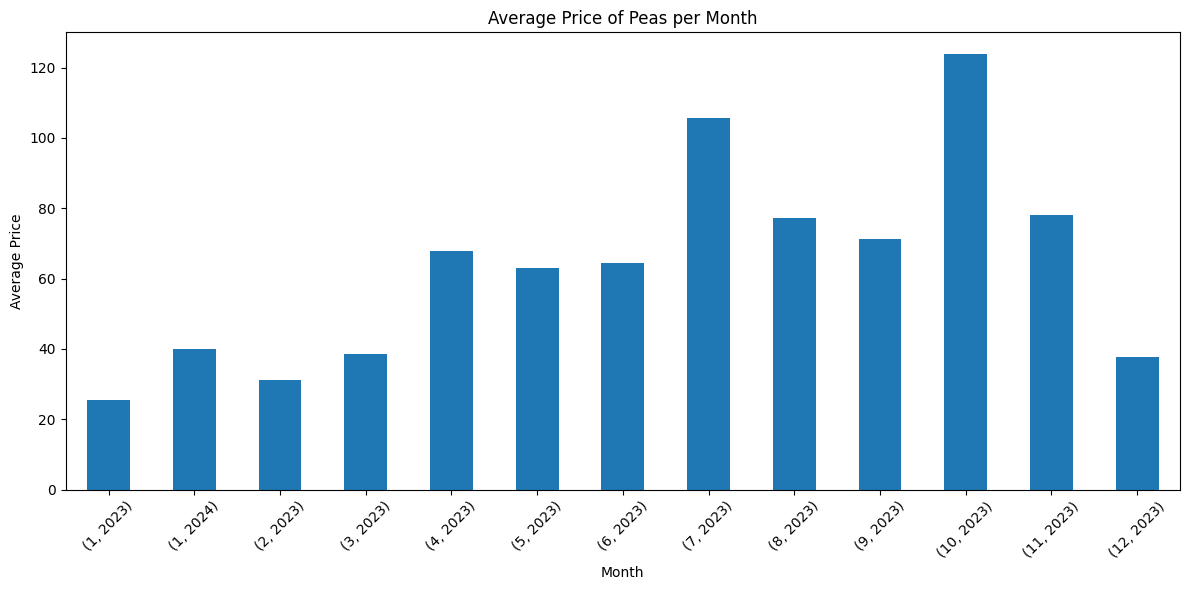

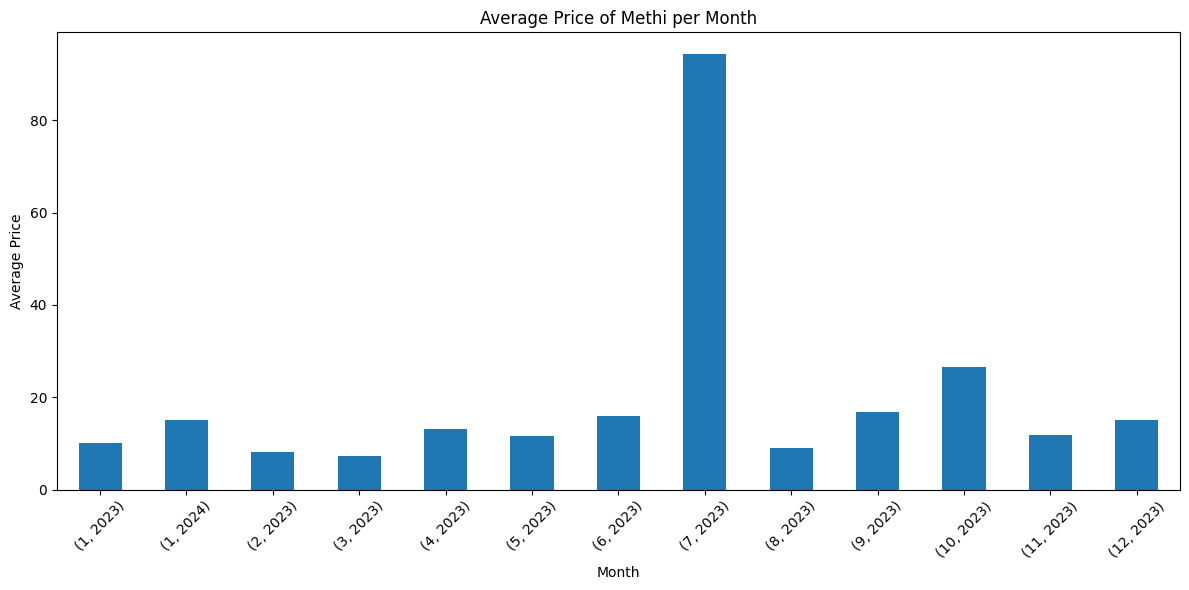

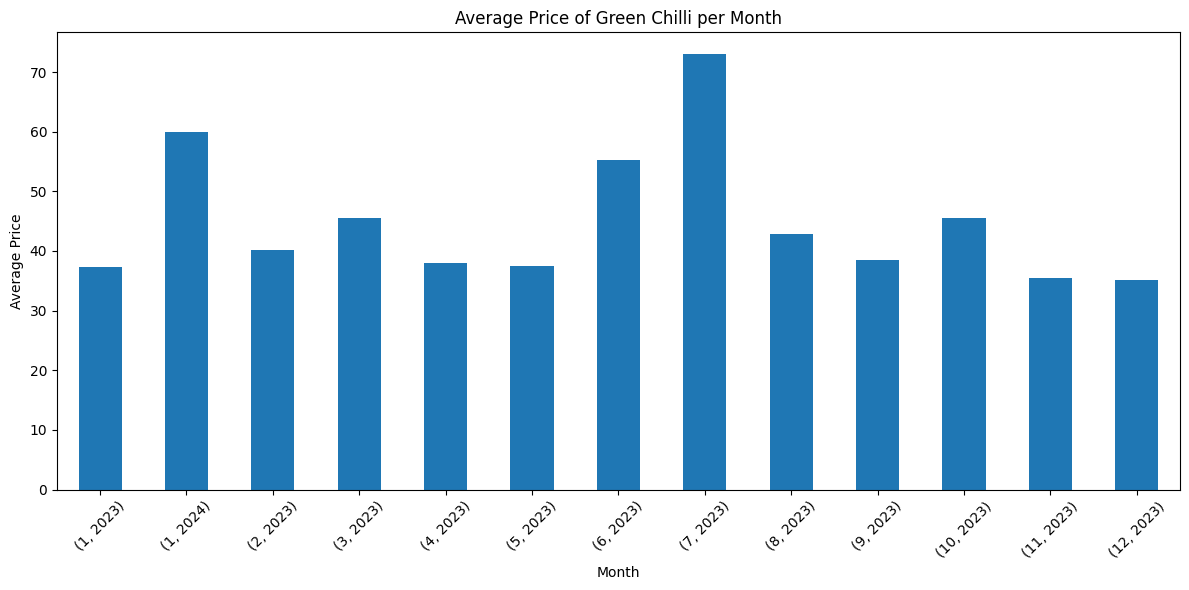

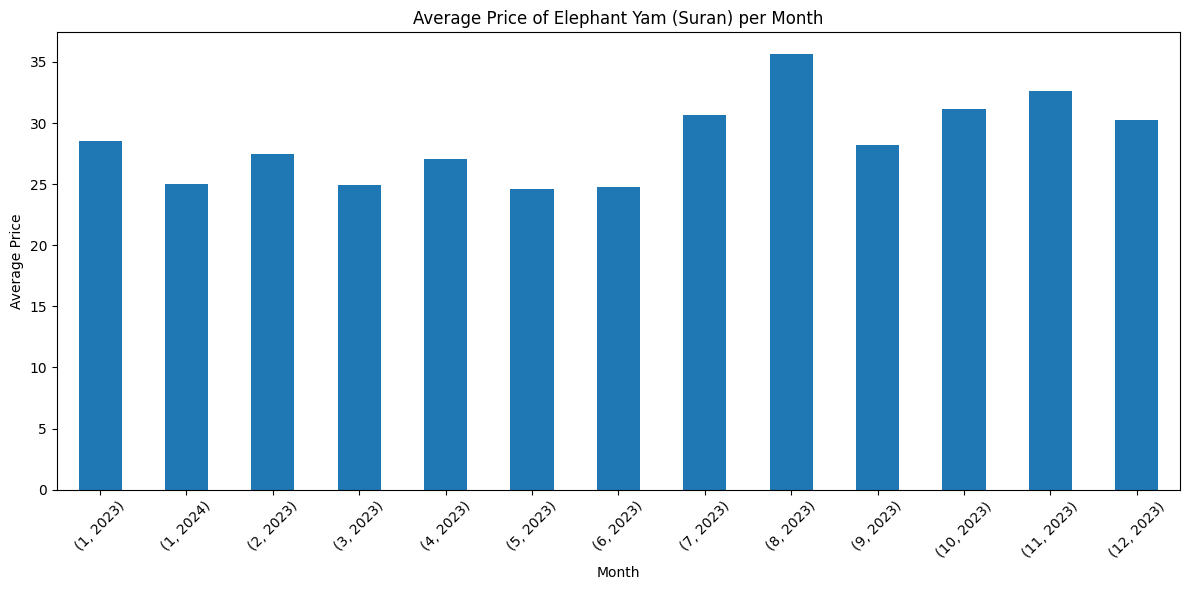

In [34]:
# prompt: Using dataframe df: plot bar graph of average price for each month per vegetable.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Price Dates' to datetime objects
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Extract month and year from 'Price Dates'
df['Month'] = df['Price Dates'].dt.month
df['Year'] = df['Price Dates'].dt.year

# Calculate the average price for each month and vegetable
average_prices = df.groupby(['Month', 'Year'])[['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']].mean()


# Plot bar graph for each vegetable
for vegetable in ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']:
    plt.figure(figsize=(12, 6))
    average_prices[vegetable].plot(kind='bar')
    plt.title(f'Average Price of {vegetable} per Month')
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()